In [35]:
# 자바 설치는 인터넷 참조 - 자바는 MyBox에 있음.
#2024년 08월 05일
#자바 버전 확인:
#cmd
#java -version
#javac -version

#1.
#cmd
#pip install jpype1 : java Lib 사용 가능
#pip install konlpy

In [36]:
import pandas as pd
from konlpy.tag import Okt

# 엑셀 파일 불러오기
file_path = 'D:/git_crawling/blog_data.xlsx'
df = pd.read_excel(file_path)

# 'Title' 열의 데이터를 하나의 텍스트 파일로 저장
with open('word_crawling.txt', 'w', encoding='utf-8') as file:
    titles = df['Title'].tolist()  # 'Title' 열의 데이터를 리스트로 변환
    for title in titles:
        file.write(title + '\n')  # 각 제목을 줄바꿈하여 텍스트 파일로 저장

# 한글 텍스트에서 명사만 추출하여 데이터 프레임 생성
okt = Okt()
nouns = []

# 각 제목에서 명사만 추출
for title in titles:
    nouns.extend(okt.nouns(title))

# 명사를 데이터 프레임으로 변환
df_word = pd.DataFrame({'word': nouns})

# 결과 출력 (확인용)
print(df_word.head())


  word
0   기후
1   위기
2  해결사
3  사이다
4   탐정


In [37]:
df_word.head(10)

,word
0,기후
1,위기
2,해결사
3,사이다
4,탐정
5,눈사태
6,범인
7,찾기
8,와이즈
9,북스


In [38]:
# 글자 수 열 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,기후,2
1,위기,2
2,해결사,3
3,사이다,3
4,탐정,2
...,...,...
148,위기,2
149,인간,2
150,구희,2
151,글,1


In [39]:
# 두 글자 이상 단어만 남김 - 글자에 의미가 있어야 함.
df_word = df_word.query('count >=2')
df_word.sort_values('count')

,word,count
0,기후,2
107,위기,2
106,기후,2
105,행동,2
104,집중,2
...,...,...
50,문화생활,4
90,보도자료,4
74,도시농업,4
37,지구온난화,5


In [40]:
# 단어 빈도 구하기
# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending= False)
df_word

,word,n
57,위기,21
15,기후,21
20,대응,5
46,시대,3
14,기술,3
...,...,...
29,방석,1
28,발전소,1
27,물리학자,1
26,문화생활,1


In [41]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
57,위기,21
15,기후,21
20,대응,5
46,시대,3
14,기술,3
42,석탄,2
66,전환,2
88,환경,2
81,터전,1
55,운영,1


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# 가로 세로 크기 설정  + 폰트
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                    'figure.dpi'  : '120',
                    'figure.figsize' : [6.5, 6]})


<Axes: xlabel='n', ylabel='word'>

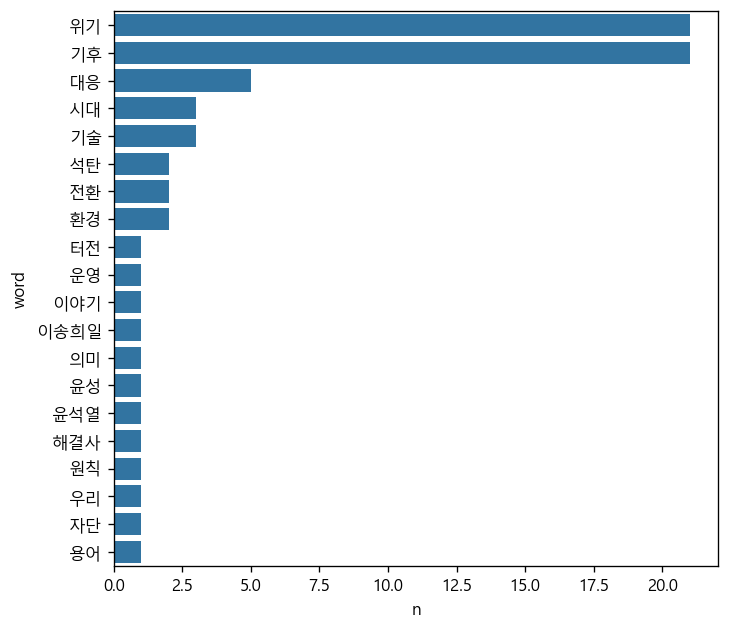

In [43]:
# 막대 그래프 만들기
sns.barplot(data = top20, y='word', x='n')

In [44]:
# pip install wordcloud - cmd에서 실시

In [45]:
font = 'malgun.ttf'

In [46]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'위기': 21,
 '기후': 21,
 '대응': 5,
 '시대': 3,
 '기술': 3,
 '석탄': 2,
 '전환': 2,
 '환경': 2,
 '터전': 1,
 '운영': 1,
 '이야기': 1,
 '이송희일': 1,
 '의미': 1,
 '윤성': 1,
 '윤석열': 1,
 '해결사': 1,
 '원칙': 1,
 '우리': 1,
 '자단': 1,
 '용어': 1,
 '와이즈': 1,
 '올림픽': 1,
 '행동': 1,
 '에코페미니즘': 1,
 '에디': 1,
 '아산': 1,
 '인간': 1,
 '적응': 1,
 '탐정': 1,
 '찾기': 1,
 '탄소': 1,
 '친환경': 1,
 '치유': 1,
 '추어': 1,
 '토건': 1,
 '토론회': 1,
 '첨단': 1,
 '집중': 1,
 '플루': 1,
 '진행': 1,
 '파리': 1,
 '지구온난화': 1,
 '증거': 1,
 '신규': 1,
 '주의': 1,
 '정부': 1,
 '중립': 1,
 '가족': 1,
 '스마트': 1,
 '리얼': 1,
 '도시': 1,
 '눈사태': 1,
 '농업': 1,
 '김상욱': 1,
 '기후변화': 1,
 '기반': 1,
 '그림': 1,
 '그린피스': 1,
 '규탄': 1,
 '국내외': 1,
 '구희': 1,
 '교육사': 1,
 '교실': 1,
 '교수': 1,
 '광명시': 1,
 '개최': 1,
 '강화': 1,
 '도시농업': 1,
 '만능': 1,
 '강연': 1,
 '말목': 1,
 '성장': 1,
 '상황': 1,
 '삼척': 1,
 '사이다': 1,
 '사실': 1,
 '사기': 1,
 '불평등': 1,
 '북스': 1,
 '부의': 1,
 '보도자료': 1,
 '법적': 1,
 '범인': 1,
 '방안': 1,
 '방석': 1,
 '발전소': 1,
 '물리학자': 1,
 '문화생활': 1,
 '센터': 1}

In [47]:
# Word Cloud 만들기
from wordcloud import WordCloud

In [48]:
wc = WordCloud(random_state = 1234,          # 난수 고정
                font_path = font,             # 폰트 설정
                width = 400,                  # 가로 크기
                height = 400,                 # 세로 크기
                background_color = 'white')   # 배경색

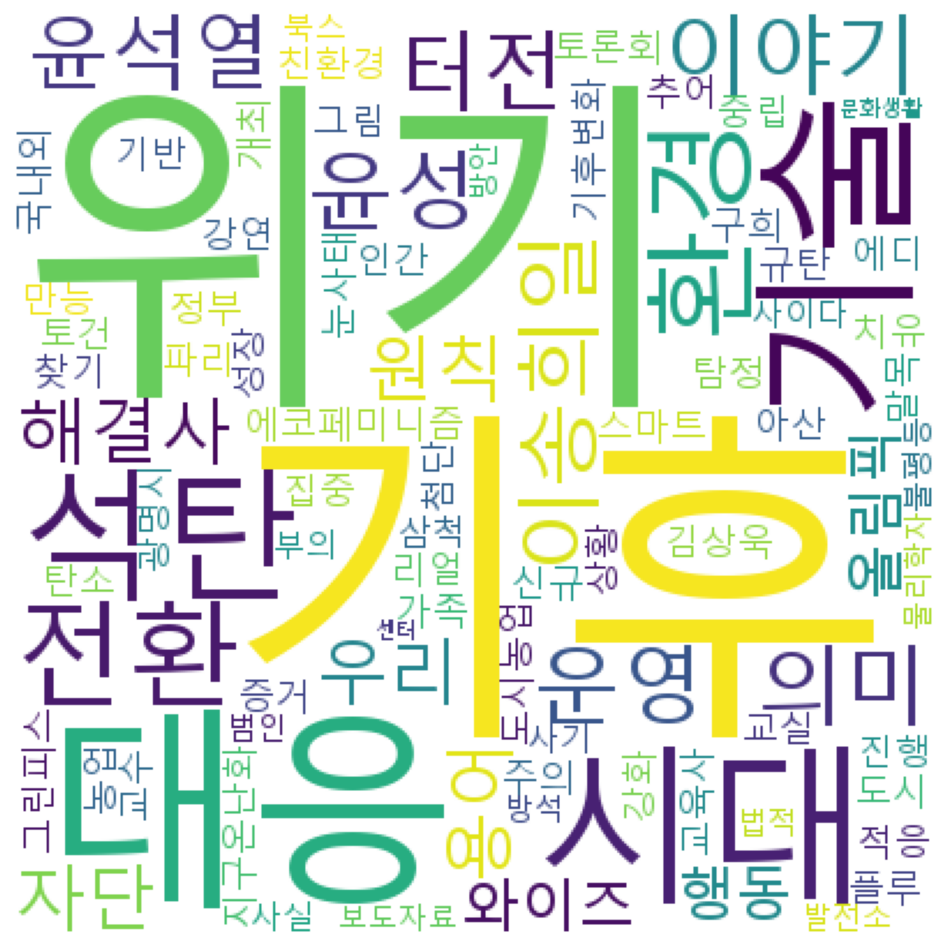

In [49]:
# 워드 클라우드(wc) 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드(wc) 출력 #
plt.figure(figsize=(10,10)) # 가로, 세로 크기 설정
plt.axis('off') # 워드 클라우드니까 x축 필요없음. 테두리 선 없애기
plt.imshow(img_wordcloud)

In [50]:
# mask 적용 
import PIL
import PIL.Image
icon = PIL.Image.open('d:/data/world.png')

In [51]:
# png 파일로 mask 생성
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

In [52]:
wc = WordCloud(random_state = 1234,          # 난수 고정
                font_path = font,             # 폰트 설정
                width = 400,                  # 가로 크기
                height = 400,                 # 세로 크기
                background_color = 'white',   # 배경색
                mask = img)

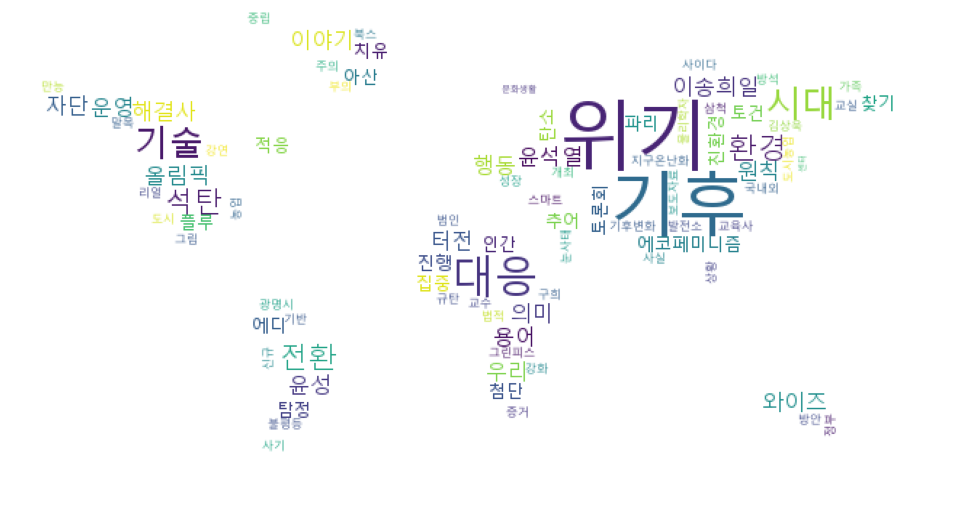

In [53]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력 #
plt.figure(figsize=(10,10)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)